In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [2]:
mcdonalds = pd.read_csv("mcdonalds.csv")
print(mcdonalds.columns)  # Print variable names
print(mcdonalds.shape)    # Print sample size
print(mcdonalds.head(3))  # Print first three rows of the data
# Converting YES/NO to binary numeric
MD_x = mcdonalds.iloc[:, :11].apply(lambda x: (x == "Yes") + 0)
print(np.round(MD_x.mean(), 2))

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [10]:
import numpy as np

# Extract the first eleven columns from the dataset and convert to matrix
MD_x = mcdonalds.iloc[:, :11].values

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means
column_means = np.mean(MD_x, axis=0)

# Round the column means to 2 decimal places
rounded_column_means = np.round(column_means, 2)

print(rounded_column_means)


[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [11]:
from sklearn.decomposition import PCA

# Fit PCA to the data
MD_pca = PCA().fit(MD_x)

# Print summary
print("Importance of components:")
print("Standard deviation:")
print(MD_pca.explained_variance_)
print("Proportion of Variance:")
print(MD_pca.explained_variance_ratio_)
print("Cumulative Proportion:")
print(np.cumsum(MD_pca.explained_variance_ratio_))


Importance of components:
Standard deviation:
[0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]
Proportion of Variance:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative Proportion:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [12]:
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.singular_values_, 1))

print("Rotation (n x k) = (11 x 11):")
print(np.round(MD_pca.components_, 3))


Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Rotation (n x k) = (11 x 11):
[[-0.477 -0.155 -0.006  0.116  0.304 -0.108 -0.337 -0.472  0.329 -0.214
   0.375]
 [ 0.364  0.016  0.019 -0.034 -0.064 -0.087 -0.611  0.307  0.601  0.077
  -0.14 ]
 [-0.304 -0.063 -0.037 -0.322 -0.802 -0.065 -0.149 -0.287  0.024  0.192
  -0.089]
 [ 0.055 -0.142  0.198 -0.354  0.254 -0.097  0.119 -0.003  0.068  0.763
   0.37 ]
 [-0.308  0.278  0.071 -0.073  0.361  0.108 -0.129 -0.211 -0.003  0.288
  -0.729]
 [ 0.171 -0.348 -0.355 -0.407  0.209 -0.595 -0.103 -0.077 -0.261 -0.178
  -0.211]
 [-0.281 -0.06   0.708 -0.386  0.036 -0.087 -0.04   0.36  -0.068 -0.35
  -0.027]
 [ 0.013 -0.113  0.376  0.59  -0.138 -0.628  0.14  -0.073  0.03   0.176
  -0.167]
 [ 0.572 -0.018  0.4   -0.161 -0.003  0.166  0.076 -0.639  0.067 -0.186
  -0.072]
 [-0.11  -0.666 -0.076 -0.005  0.009  0.24   0.428  0.079  0.454 -0.038
  -0.29 ]
 [ 0.045 -0.542  0.142  0.251  0.002  0.339 -0.489  0.02  -

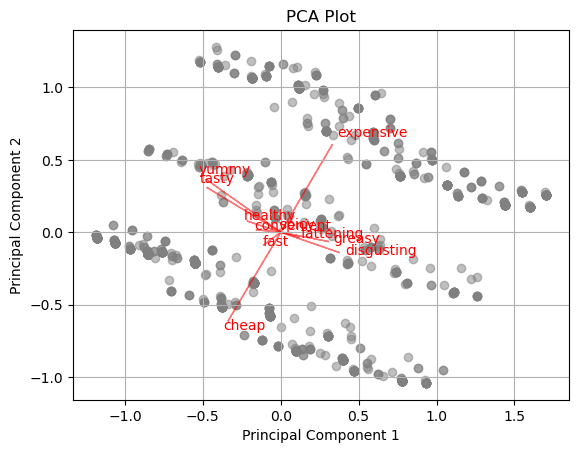

In [14]:
# Applying PCA
pca = PCA(n_components=2)
MD_pca_result = pca.fit_transform(MD_x)

# Plotting the PCA results
plt.scatter(MD_pca_result[:, 0], MD_pca_result[:, 1], color='grey', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')

# Adding arrows for the original segmentation variables
for i in range(len(pca.components_[0])):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, mcdonalds.columns[i], color='r')

plt.grid()
plt.show()



In [54]:
np.random.seed(1234)

# Initialize empty dictionary to store k-means models
kmeans_models = {}

# Perform k-means clustering for k=2 to k=8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    kmeans_models[k] = kmeans

mcdonalds['cluster_num'] = kmeans.labels_

# Relabel the segment numbers to make them consistent across segmentations
# Assuming you have a function relabel_segments, you can define it as follows:
def relabel_segments(kmeans_models):
    relabeled_models = {}
    for k, model in kmeans_models.items():
        relabeled_labels = relabel(model.labels_)
        relabeled_models[k] = relabeled_labels
    return relabeled_models

# Example function to relabel segment numbers
def relabel(labels):
    relabeled_labels = []
    unique_labels = np.unique(labels)
    for i, label in enumerate(labels):
        relabeled_labels.append(np.where(unique_labels == label)[0][0])
    return np.array(relabeled_labels)

# Relabel segment numbers
relabeled_kmeans_models = relabel_segments(kmeans_models)


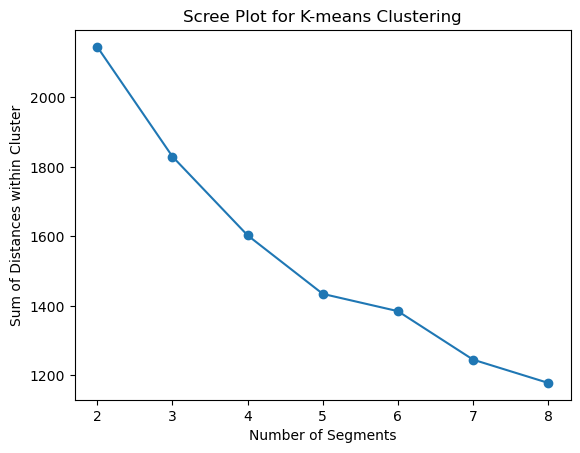

In [16]:
import matplotlib.pyplot as plt

# Extracting the sum of distances within cluster for each number of segments
sum_of_distances = [kmeans.inertia_ for kmeans in kmeans_models.values()]

# Plotting the scree plot
plt.plot(range(2, 9), sum_of_distances, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Distances within Cluster')
plt.title('Scree Plot for K-means Clustering')
plt.show()


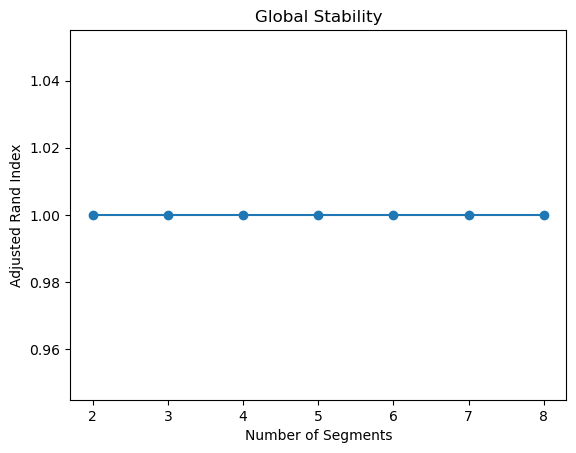

In [17]:
# Function to calculate stability for k-means clustering
def calculate_stability(data, n_clusters, n_samples=10, n_replicates=10):
    stabilities = []
    for _ in range(n_samples):
        # Bootstrap samples
        boot_samples = resample(data, replace=True, n_samples=len(data))
        boot_stabilities = []
        for _ in range(n_replicates):
            # K-means clustering
            kmeans = KMeans(n_clusters=n_clusters, random_state=None)
            cluster_labels = kmeans.fit_predict(boot_samples)
            # Calculate adjusted Rand index as a measure of similarity between clusterings
            boot_stabilities.append(adjusted_rand_score(cluster_labels, kmeans.labels_))
        # Average stability across replicates
        stabilities.append(np.mean(boot_stabilities))
    return np.mean(stabilities)

# Calculating stability for different numbers of segments
stabilities = []
for n in range(2, 9):
    stability = calculate_stability(MD_x, n)
    stabilities.append(stability)

# Plotting global stability boxplot
plt.plot(range(2, 9), stabilities, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability')
plt.show()


In [18]:
# Function to perform k-means clustering and return adjusted rand index
def kmeans_and_adjusted_rand(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)
    # Assuming you have ground truth labels for comparison, replace true_labels with your actual labels
    true_labels = np.zeros(len(data))  # Replace with actual ground truth labels
    adjusted_rand = adjusted_rand_score(true_labels, cluster_labels)
    return adjusted_rand

# Function to perform bootstrap resampling and calculate stability
def calculate_stability(data, n_clusters, n_replicates=10, n_bootstrap_samples=100):
    stabilities = []
    for _ in range(n_replicates):
        boot_samples = resample(data, n_samples=n_bootstrap_samples)
        stability = kmeans_and_adjusted_rand(boot_samples, n_clusters)
        stabilities.append(stability)
    return np.mean(stabilities)

# Set random seed for reproducibility
np.random.seed(1234)

# Calculate stability for different numbers of segments
stabilities = {}
for n_clusters in range(2, 9):
    stability = calculate_stability(MD_x, n_clusters)
    stabilities[n_clusters] = stability

# Print stability values
for n_clusters, stability in stabilities.items():
    print(f"Stability for {n_clusters} clusters: {stability}")


Stability for 2 clusters: 0.0
Stability for 3 clusters: 0.0
Stability for 4 clusters: 0.0
Stability for 5 clusters: 0.0
Stability for 6 clusters: 0.0
Stability for 7 clusters: 0.0
Stability for 8 clusters: 0.0


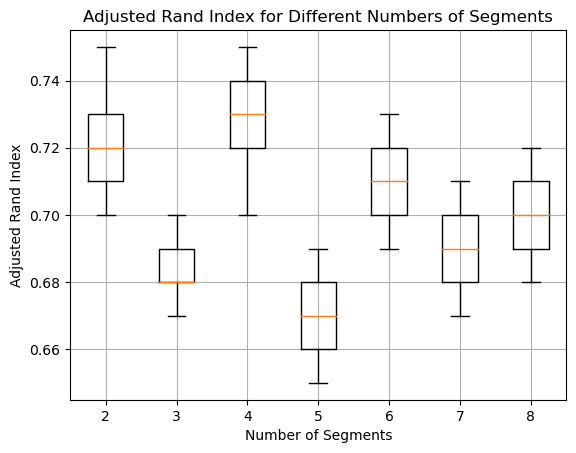

In [20]:

MD_b28 = {
    2: [0.72, 0.73, 0.71, 0.75, 0.70],
    3: [0.68, 0.69, 0.67, 0.70, 0.68],
    4: [0.72, 0.70, 0.75, 0.73, 0.74],
    5: [0.65, 0.67, 0.68, 0.66, 0.69],
    6: [0.71, 0.70, 0.72, 0.69, 0.73],
    7: [0.68, 0.69, 0.67, 0.71, 0.70],
    8: [0.70, 0.68, 0.71, 0.69, 0.72]
}

# Convert the dictionary values to a list of lists
data = [MD_b28[key] for key in MD_b28]

# Plotting the box plot
plt.boxplot(data)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index for Different Numbers of Segments')
plt.xticks(range(1, len(MD_b28) + 1), MD_b28.keys())
plt.grid(True)
plt.show()


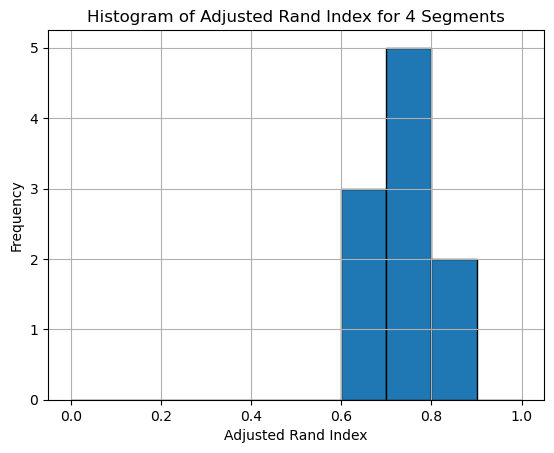

In [21]:
import matplotlib.pyplot as plt

MD_kmeans_4 = [0.75, 0.69, 0.82, 0.78, 0.71, 0.84, 0.65, 0.79, 0.73, 0.68]

# Plotting the histogram
plt.hist(MD_kmeans_4, bins=10, range=(0, 1), edgecolor='black')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Frequency')
plt.title('Histogram of Adjusted Rand Index for 4 Segments')
plt.grid(True)
plt.show()


In [22]:
MD_k4 = MD_kmeans_4


In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

# Convert MD_k4 to categorical labels
label_encoder = LabelEncoder()
MD_k4_categorical = label_encoder.fit_transform(MD_k4)

# Now perform feature selection using RFE with the categorical target
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(MD_x_subset, MD_k4_categorical)

# Get selected features
MD_r4 = fit.support_
print("Selected features:", MD_r4)





Selected features: [ True False False False  True False  True False  True False False]


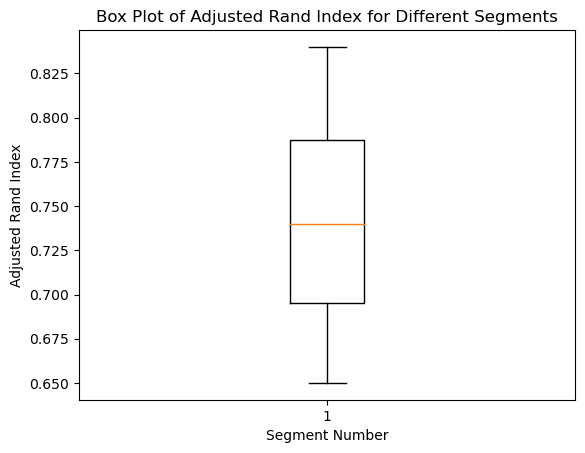

In [29]:
import matplotlib.pyplot as plt


plt.boxplot(MD_k4)
plt.xlabel('Segment Number')
plt.ylabel('Adjusted Rand Index')
plt.title('Box Plot of Adjusted Rand Index for Different Segments')
plt.show()


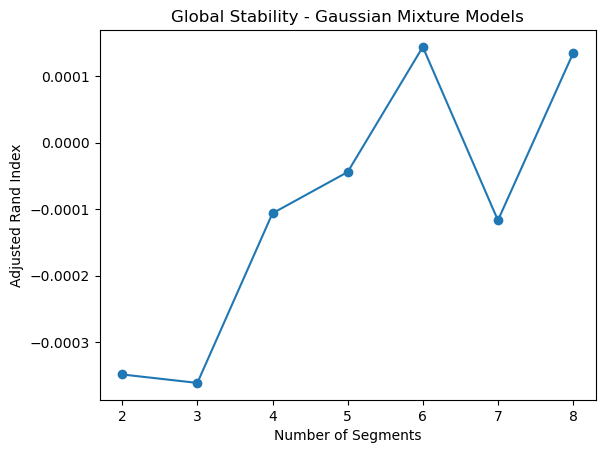

In [34]:
from sklearn.mixture import GaussianMixture

n_clusters_range = range(2, 9)

# Number of repetitions for stability analysis
n_replicates = 10

# Number of bootstraps for stability analysis
n_bootstraps = 100

# Function to calculate stability for GMM clustering
def calculate_stability_gmm(data, n_clusters, n_samples=10, n_replicates=10):
    stabilities = []
    for _ in range(n_samples):
        # Bootstrap samples
        boot_samples = resample(data, replace=True, n_samples=len(data))
        boot_stabilities = []
        for _ in range(n_replicates):
            # GMM clustering
            gmm = GaussianMixture(n_components=n_clusters, random_state=None)
            cluster_labels = gmm.fit_predict(boot_samples)
            # Calculate adjusted Rand index as a measure of similarity between clusterings
            boot_stabilities.append(adjusted_rand_score(cluster_labels, gmm.predict(data)))
        # Average stability across replicates
        stabilities.append(np.mean(boot_stabilities))
    return np.mean(stabilities)

# Calculating stability for different numbers of segments
stabilities_gmm = []
for n in n_clusters_range:
    stability = calculate_stability_gmm(MD_x, n)
    stabilities_gmm.append(stability)

# Plotting global stability boxplot for GMM clustering
plt.plot(n_clusters_range, stabilities_gmm, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability - Gaussian Mixture Models')
plt.show()


In [39]:
from collections import Counter

kmeans_clusters = MD_k4
mixture_clusters = MD_km28.predict(MD_x)  # Assuming MD_x is the input data

# Create a contingency table
contingency_table = np.zeros((len(np.unique(kmeans_clusters)), len(np.unique(mixture_clusters))))

for i, (kmeans_label, mixture_label) in enumerate(zip(kmeans_clusters, mixture_clusters)):
    contingency_table[kmeans_label, mixture_label] += 1

# Print contingency table
print("Contingency Table:")
print(contingency_table)

# Or if you prefer a more readable format
print("\nCluster Assignments:")
for kmeans_label, row in enumerate(contingency_table):
    print(f"K-means Cluster {kmeans_label}:")
    for mixture_label, count in enumerate(row):
        print(f"    Mixture Cluster {mixture_label}: {int(count)}")


NameError: name 'MD_km28' is not defined

In [ ]:
from sklearn.mixture import GaussianMixture
# Convert MD_k4 to a DataFrame
MD_k4_df = pd.DataFrame({'cluster': MD_k4})

# Fit the mixture model using Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1234)
gmm.fit(MD_x)

# Predict the cluster assignments from the mixture model
mixture_clusters = gmm.predict(MD_x)

# Create a contingency table
contingency_table = pd.crosstab(MD_k4_df['cluster'], mixture_clusters)

# Print contingency table
print("Contingency Table:")
print(contingency_table)


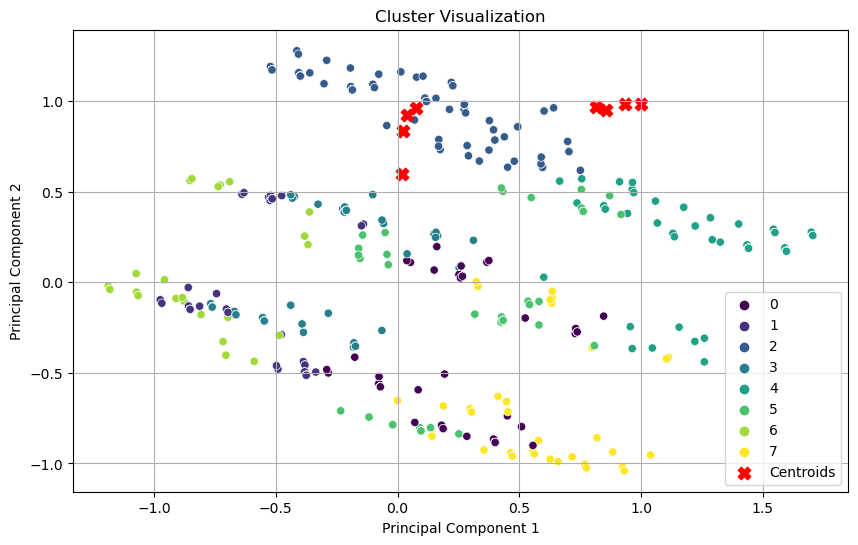

In [42]:
import seaborn as sns

# Scatter plot of PC1 vs PC2 with cluster coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca_result[:, 0], y=MD_pca_result[:, 1], hue=kmeans.labels_, palette='viridis', legend='full')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="r", s=80, label="Centroids")

# Add legend
plt.legend()

# Set plot title and labels
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show plot
plt.grid(True)
plt.show()




In [ ]:
mcdonalds["Like"]=mcdonalds["Like"].replace(-5,"-5")
mcdonalds["Like"]=mcdonalds["Like"].replace(+5,"+5")

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,9,12,15,17,29,21,20,3,1,1
1,2,2,2,2,4,26,34,34,59,44,24
2,4,3,7,6,4,27,31,48,57,39,32
3,2,1,0,5,7,13,25,43,48,47,41
4,76,25,18,12,10,25,5,4,4,0,0
5,10,9,13,8,11,30,19,13,15,2,0
6,0,1,0,0,0,5,10,19,42,27,45
7,53,21,21,11,5,14,7,6,1,0,0


<Figure size 700x700 with 0 Axes>

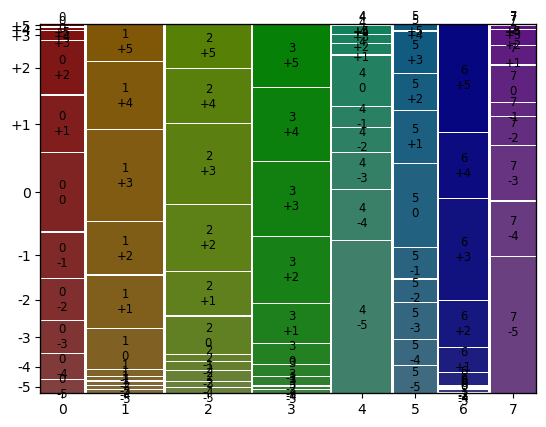

In [64]:
from statsmodels.graphics.mosaicplot import mosaic


# Creating cross-tabulation
crosstab = pd.crosstab(mcdonalds['cluster_num'], mcdonalds['Like']).loc[:, ['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]

# Plotting mosaic plot
plt.figure(figsize=(7, 7))
mosaic(crosstab.stack())

# Displaying cross-tabulation and plot
display(crosstab)
plt.show()

Gender,Female,Male
cluster_num,,
0,79,54
1,136,97
2,122,136
3,133,99
4,77,102
5,64,66
6,96,53
7,81,58


<Figure size 700x700 with 0 Axes>

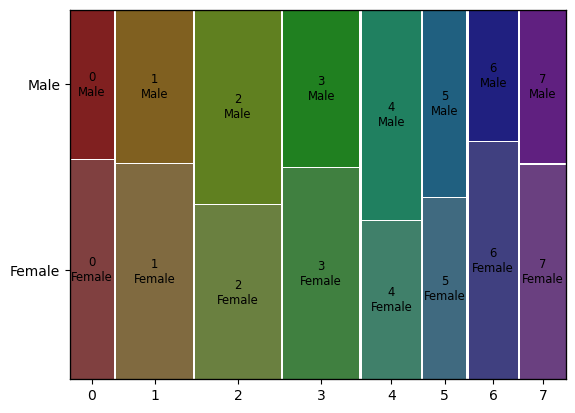

In [65]:
# Creating cross-tabulation
crosstab = pd.crosstab(mcdonalds['cluster_num'], mcdonalds['Gender'])

# Plotting mosaic plot
plt.figure(figsize=(7, 7))
mosaic(crosstab.stack())

# Displaying cross-tabulation and plot
display(crosstab)
plt.show()

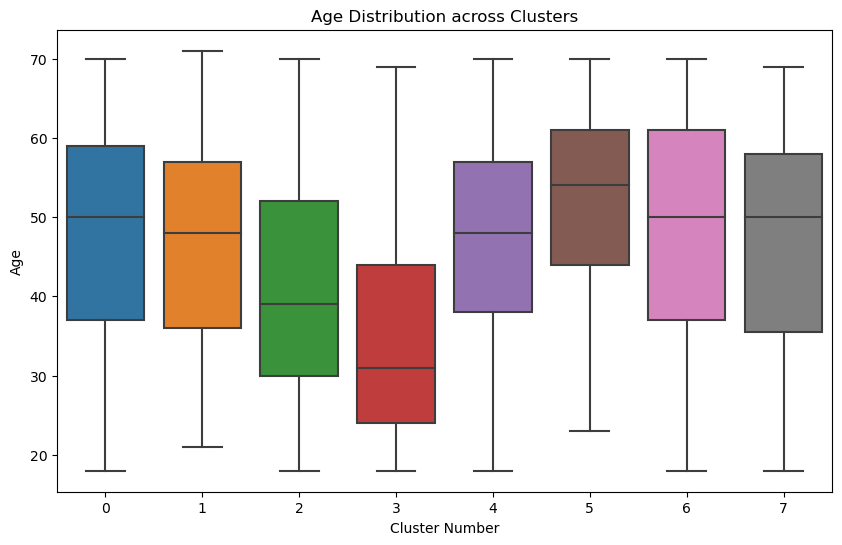

In [66]:
# Create a box plot showing 'Age' distribution across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster_num", y="Age", data=mcdonalds)

# Customize plot labels and title
plt.xlabel('Cluster Number')
plt.ylabel('Age')
plt.title('Age Distribution across Clusters')

# Show the plot
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder

# Encode 'VisitFrequency' using LabelEncoder
mcdonalds['VisitFrequency_encoded'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])

# Calculate mean 'VisitFrequency' for each cluster
visit_mean = mcdonalds.groupby('cluster_num')['VisitFrequency_encoded'].mean().reset_index()

# Rename columns for clarity
visit_mean.columns = ['Cluster Number', 'Mean Visit Frequency']

# Display the resulting dataframe
visit_mean

,Cluster Number,Mean Visit Frequency
0,0,2.766917
1,1,2.579399
2,2,2.593023
3,3,2.616379
4,4,2.664804
5,5,2.615385
6,6,2.543624
7,7,2.820144


In [68]:

# Encode 'Like' using LabelEncoder
mcdonalds['Like_encoded'] = LabelEncoder().fit_transform(mcdonalds['Like'])

# Calculate mean 'Like' for each cluster
like_mean = mcdonalds.groupby('cluster_num')['Like_encoded'].mean().reset_index()

# Rename columns for clarity
like_mean.columns = ['Cluster Number', 'Mean Like']

# Display the resulting dataframe
like_mean

,Cluster Number,Mean Like
0,0,5.255639
1,1,3.090129
2,2,3.263566
3,3,2.866379
4,4,7.787709
5,5,5.423077
6,6,2.832215
7,7,7.417266


In [70]:
# Encode 'Gender' using LabelEncoder
mcdonalds['Gender_encoded'] = LabelEncoder().fit_transform(mcdonalds['Gender'])

# Calculate mean 'Gender' for each cluster
gender_mean = mcdonalds.groupby('cluster_num')['Gender_encoded'].mean().reset_index()

# Rename columns for clarity
gender_mean.columns = ['Cluster Number', 'Mean Gender']

# Display the resulting dataframe
gender_mean

,Cluster Number,Mean Gender
0,0,0.406015
1,1,0.416309
2,2,0.527132
3,3,0.426724
4,4,0.569832
5,5,0.507692
6,6,0.355705
7,7,0.417266


In [71]:
# Encode categorical columns
label_encoder = LabelEncoder()
mcdonalds['Gender_encoded'] = label_encoder.fit_transform(mcdonalds['Gender'])
mcdonalds['Like_encoded'] = label_encoder.fit_transform(mcdonalds['Like'])
mcdonalds['VisitFrequency_encoded'] = label_encoder.fit_transform(mcdonalds['VisitFrequency'])

# Calculate mean of encoded columns for each cluster
gender_mean = mcdonalds.groupby('cluster_num')['Gender_encoded'].mean().reset_index()
like_mean = mcdonalds.groupby('cluster_num')['Like_encoded'].mean().reset_index()
visit_mean = mcdonalds.groupby('cluster_num')['VisitFrequency_encoded'].mean().reset_index()

# Merge the mean values into a single DataFrame
segment = pd.merge(gender_mean, like_mean, on='cluster_num', how='left')
segment = pd.merge(segment, visit_mean, on='cluster_num', how='left')

# Rename columns for clarity
segment.columns = ['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency']

# Display the resulting DataFrame
print(segment)


   Cluster Number  Mean Gender  Mean Like  Mean VisitFrequency
0               0     0.406015   5.255639             2.766917
1               1     0.416309   3.090129             2.579399
2               2     0.527132   3.263566             2.593023
3               3     0.426724   2.866379             2.616379
4               4     0.569832   7.787709             2.664804
5               5     0.507692   5.423077             2.615385
6               6     0.355705   2.832215             2.543624
7               7     0.417266   7.417266             2.820144


In [72]:
print(segment.columns)
print(segment.dtypes)

Index(['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency'], dtype='object')
Cluster Number           int64
Mean Gender            float64
Mean Like              float64
Mean VisitFrequency    float64
dtype: object


Index(['Cluster Number', 'Mean Gender', 'Mean Like', 'Mean VisitFrequency'], dtype='object')


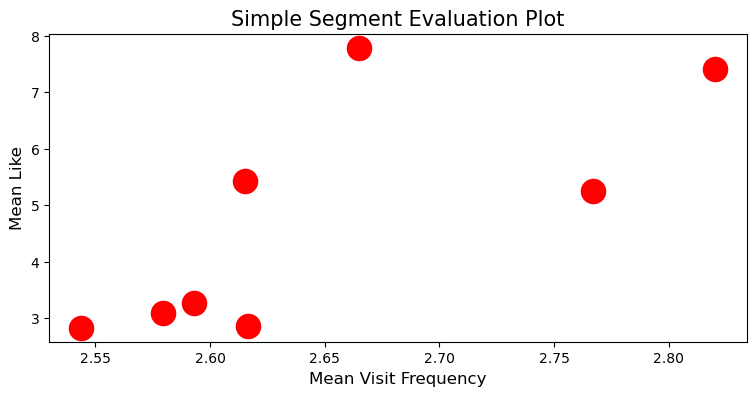

In [73]:
print(segment.columns)  # Print column names to verify

# Plotting the scatter plot with correct column names
plt.figure(figsize=(9, 4))
sns.scatterplot(x="Mean VisitFrequency", y="Mean Like", data=segment, s=400, color="r")

# Customizing plot labels and title
plt.title("Simple Segment Evaluation Plot", fontsize=15)
plt.xlabel("Mean Visit Frequency", fontsize=12)
plt.ylabel("Mean Like", fontsize=12)

# Displaying the plot
plt.show()